In [43]:
#importnant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for Data preprocessing
from sklearn.preprocessing import MinMaxScaler

# for building the model
import tensorflow as tf
from tensorflow.keras import layers,losses,metrics,optimizers

In [44]:
#read The data
df = pd.read_csv('/kaggle/input/UjiIndoorLoc/TrainingData.csv')

In [45]:
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [46]:
df.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB


In [48]:
columns = df.columns

# stands for access points
ap = columns[:520]
details = columns[520:]

In [49]:
access_points = df[ap]
access_points = access_points.apply(abs)
other_details = df[details]
other_details['LONGITUDE'] = other_details['LONGITUDE'].apply(abs)

/tmp/ipykernel_3995/2813699169.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_details['LONGITUDE'] = other_details['LONGITUDE'].apply(abs)


In [50]:
access_points.columns

Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP511', 'WAP512', 'WAP513', 'WAP514', 'WAP515', 'WAP516', 'WAP517',
       'WAP518', 'WAP519', 'WAP520'],
      dtype='object', length=520)

In [51]:
other_details.columns

Index(['LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'],
      dtype='object')

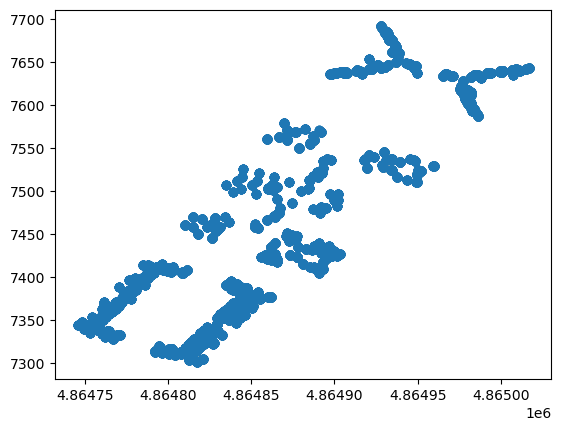

In [52]:
plt.scatter(other_details['LATITUDE'],other_details['LONGITUDE'])

#### There is many Idle access point wasn't detected

In [53]:
counter = 0
for i in ap:
    print(f'Unique Values for {i}: {access_points[i].unique()}\n\n')
    if access_points[i].unique().shape == (1,):
        counter+=1
        
print('There is ',counter,' access point wasn\'t detected!')

Unique Values for WAP001: [100  97  95  96  94  93]


Unique Values for WAP002: [100  90  86]


Unique Values for WAP003: [100]


Unique Values for WAP004: [100]


Unique Values for WAP005: [100  92  96  97  95  93  90  89  91  94]


Unique Values for WAP006: [100  94  90  89  79  87  68  71  67  81  95  93  83  78  85  86  91  92
  62  65  80  82  96  70  88  72  84  58  76  66  60  77  74  61  98  97]


Unique Values for WAP007: [100  84  80  82  93  75  86  88  69  73  74  67  60  62  54  72  76  61
  65  49  83  92  71  78  81  77  79  90  85  95  94  89  96  97  87  68
  56  59  55  98  91  63  51  57  58  53  70  66  48  99  47  64]


Unique Values for WAP008: [100  97  83  90  95  84  98  91  80  92  86  81  94  88  85  96  87  89
  72  79  82  65  66  69  77  73  70  78  68  93  71  67  74  63  62  75
  76  61  64]


Unique Values for WAP009: [100  70  83  86  68  85  73  66  62  94  87  98  88  76  71  77  63  74
  79  93  96  90  69  56  67  82  80  92  91  61  84  59  95  64

In [54]:
for i in details:
    print(f'{i} Ranging From: {other_details[i].min()} to {other_details[i].max()}\n\n')

LONGITUDE Ranging From: 7300.818990092725 to 7691.338399998844


LATITUDE Ranging From: 4864745.745015971 to 4865016.687799998


FLOOR Ranging From: 0 to 4


BUILDINGID Ranging From: 0 to 2


SPACEID Ranging From: 1 to 254


RELATIVEPOSITION Ranging From: 1 to 2


USERID Ranging From: 1 to 18


PHONEID Ranging From: 1 to 24


TIMESTAMP Ranging From: 1369908924 to 1371737745




## Data Details

#### The Input data should be the Rss of 520 access point and we should take into account that there is about 55 access point wasn't detected!

#### also the output data should be the 3 dimensions (x: latitude, y: longitude, z: floor).

In [55]:
def normalize_axis(x, maximum=1):
    return (x - x.min())/(x.max() - x.min()) * maximum

In [56]:
# Train
LONGITUDE = normalize_axis(np.asarray(other_details['LONGITUDE']),1)
LATITUDE = normalize_axis(np.asarray(other_details['LATITUDE']),1)

LONGITUDE = np.round_(LONGITUDE, decimals=4)
LATITUDE = np.round_(LATITUDE, decimals=4)

other_details['LONGITUDE'] = LONGITUDE
other_details['LATITUDE'] = LATITUDE

/tmp/ipykernel_3995/2786590028.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_details['LONGITUDE'] = LONGITUDE
/tmp/ipykernel_3995/2786590028.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_details['LATITUDE'] = LATITUDE


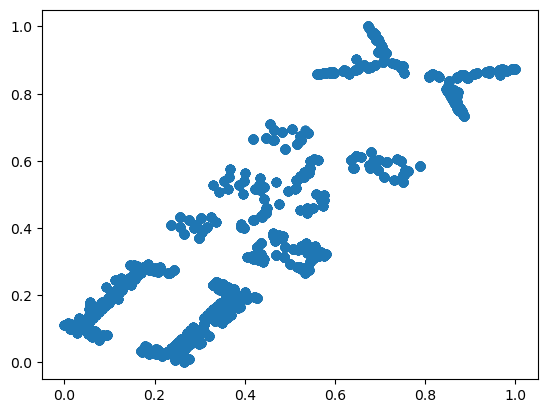

In [57]:
plt.scatter(other_details['LATITUDE'],other_details['LONGITUDE'])

In [58]:
# Define The Training Data, and Testing Data for the regressor
reg_labels = ['LONGITUDE','LATITUDE']

train_x = access_points[:15000]
reg_train_y = other_details[reg_labels][:15000]
building_train_y = other_details['BUILDINGID'][:15000]
floor_train_y = other_details['FLOOR'][:15000]


test_x = access_points[15000:]
reg_test_y = other_details[reg_labels][15000:]
building_test_y = other_details['BUILDINGID'][15000:] 
floor_test_y = other_details['FLOOR'][15000:]

In [59]:
train_x.replace(100,0,inplace=True)
test_x.replace(100,0,inplace=True)

/tmp/ipykernel_3995/1895420405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x.replace(100,0,inplace=True)
/tmp/ipykernel_3995/1895420405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x.replace(100,0,inplace=True)


In [60]:
from sklearn.preprocessing import OneHotEncoder

enc_floor = OneHotEncoder()
enc_building = OneHotEncoder()

building_train_y = enc_building.fit_transform(np.asarray(building_train_y).reshape(-1,1)).toarray()
floor_train_y = enc_floor.fit_transform(np.asarray(floor_train_y).reshape(-1,1)).toarray()

In [61]:
building_test_y = enc_building.transform(np.asarray(building_test_y).reshape(-1,1)).toarray()
floor_test_y = enc_floor.transform(np.asarray(floor_test_y).reshape(-1,1)).toarray()

In [62]:
train_x.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,97,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
building_train_y

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [64]:
building_train_y.shape

(15000, 3)

In [65]:
floor_train_y

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [66]:
floor_train_y.shape

(15000, 5)

In [67]:
def buildRegressor():
    model = tf.keras.Sequential()
    model.add(layers.InputLayer(input_shape=[520,]))
    model.add(layers.Dense(520))
    model.add(layers.Dense(256))
    model.add(layers.Dense(256))
    model.add(layers.Dense(128))
    model.add(layers.Dense(64,activation='linear'))
    model.add(layers.Dense(32,activation='linear'))
    model.add(layers.Dense(2,activation='linear'))
    
    model.compile(optimizer='adam',loss=losses.MeanAbsoluteError(),metrics=[metrics.RootMeanSquaredError()])
    return model

def buildClassifier():
    model = tf.keras.Sequential()
    model.add(layers.InputLayer(input_shape=[520,]))
    model.add(layers.Dense(128))
    model.add(layers.Dense(64))
    model.add(layers.Dense(32,activation='relu'))
    model.add(layers.Dense(3,activation='softmax'))
    
    model.compile(optimizer='adam',loss=losses.CategoricalCrossentropy(),metrics=['accuracy'])
    return model

def buildClassifierFloor():
    model = tf.keras.Sequential()
    model.add(layers.InputLayer(input_shape=[520,]))
    model.add(layers.Dense(128))
    model.add(layers.Dense(64))
    model.add(layers.Dense(32,activation='relu'))
    model.add(layers.Dense(5,activation='softmax'))
    
    model.compile(optimizer='adam',loss=losses.CategoricalCrossentropy(),metrics=['accuracy'])
    return model

In [68]:
regressor = buildRegressor()

In [69]:
building_classifier = buildClassifier()

In [70]:
floor_classifier = buildClassifierFloor()

In [71]:
regressor.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 520)               270920    
                                                                 
 dense_16 (Dense)            (None, 256)               133376    
                                                                 
 dense_17 (Dense)            (None, 256)               65792     
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 32)                2080      
                                                                 
 dense_21 (Dense)            (None, 2)                

In [72]:
history_reg = regressor.fit(train_x,reg_train_y,epochs=100,batch_size=250)

Epoch 1/100
60/60 [==============================] - 2s 11ms/step - loss: 6.2539 - root_mean_squared_error: 18.8115
Epoch 2/100
60/60 [==============================] - 1s 11ms/step - loss: 0.5730 - root_mean_squared_error: 0.7481
Epoch 3/100
60/60 [==============================] - 1s 11ms/step - loss: 0.3737 - root_mean_squared_error: 0.4777
Epoch 4/100
60/60 [==============================] - 1s 11ms/step - loss: 0.3271 - root_mean_squared_error: 0.4184
Epoch 5/100
60/60 [==============================] - 1s 11ms/step - loss: 0.2453 - root_mean_squared_error: 0.3147
Epoch 6/100
60/60 [==============================] - 1s 11ms/step - loss: 0.2193 - root_mean_squared_error: 0.2806
Epoch 7/100
60/60 [==============================] - 1s 11ms/step - loss: 0.2132 - root_mean_squared_error: 0.2731
Epoch 8/100
60/60 [==============================] - 1s 10ms/step - loss: 0.1751 - root_mean_squared_error: 0.2236
Epoch 9/100
60/60 [==============================] - 1s 10ms/step - loss: 0.150

In [73]:
regressor.evaluate(test_x,reg_test_y)

155/155 [==============================] - 1s 3ms/step - loss: 0.0993 - root_mean_squared_error: 0.1329


[0.09931152313947678, 0.13293054699897766]

In [117]:
results = regressor.predict(test_x)

155/155 [==============================] - 0s 3ms/step


In [118]:
results.shape

(4937, 2)

In [138]:
long = []
lat = []
for i in results:
    long.append(i[0])
    lat.append(i[1])

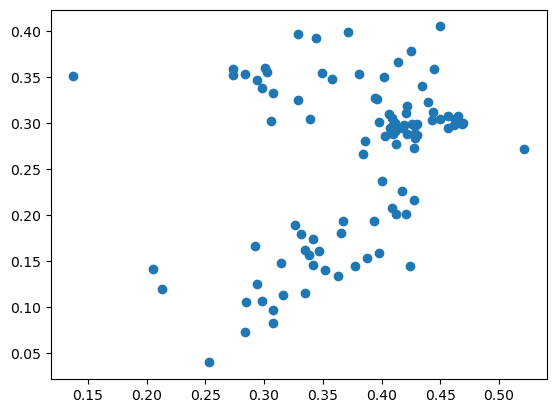

In [140]:
plt.scatter(lat[:100],long[:100])

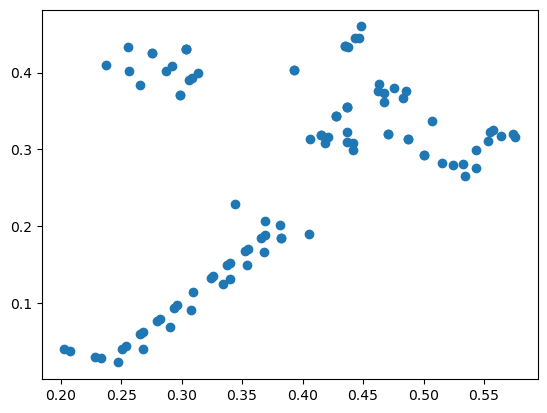

In [141]:
plt.scatter(reg_test_y['LATITUDE'][:100],reg_test_y['LONGITUDE'][:100])

In [76]:
history_building = building_classifier.fit(train_x,building_train_y,epochs=10,batch_size=100)

Epoch 1/10
150/150 [==============================] - 1s 3ms/step - loss: 0.1573 - accuracy: 0.9861
Epoch 2/10
150/150 [==============================] - 1s 3ms/step - loss: 0.0095 - accuracy: 0.9971
Epoch 3/10
150/150 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.9975
Epoch 4/10
150/150 [==============================] - 0s 3ms/step - loss: 0.0093 - accuracy: 0.9970
Epoch 5/10
150/150 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.9979
Epoch 6/10
150/150 [==============================] - 1s 3ms/step - loss: 0.0035 - accuracy: 0.9980
Epoch 7/10
150/150 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 0.9980
Epoch 8/10
150/150 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 0.9980
Epoch 9/10
150/150 [==============================] - 1s 3ms/step - loss: 0.0033 - accuracy: 0.9980
Epoch 10/10
150/150 [==============================] - 1s 3ms/step - loss: 0.0033 - accuracy: 0.9980

In [77]:
print(building_classifier.evaluate(test_x,building_test_y))

155/155 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.9984
[0.0021960062440484762, 0.9983795881271362]


In [78]:
history_floor = floor_classifier.fit(train_x,floor_train_y,epochs=10,batch_size=50)

Epoch 1/10
300/300 [==============================] - 2s 3ms/step - loss: 1.4867 - accuracy: 0.8028
Epoch 2/10
300/300 [==============================] - 1s 3ms/step - loss: 0.2928 - accuracy: 0.9163
Epoch 3/10
300/300 [==============================] - 1s 3ms/step - loss: 0.2318 - accuracy: 0.9313
Epoch 4/10
300/300 [==============================] - 1s 3ms/step - loss: 0.1840 - accuracy: 0.9423
Epoch 5/10
300/300 [==============================] - 1s 3ms/step - loss: 0.1598 - accuracy: 0.9489
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: 0.1589 - accuracy: 0.9513
Epoch 7/10
300/300 [==============================] - 1s 3ms/step - loss: 0.1294 - accuracy: 0.9586
Epoch 8/10
300/300 [==============================] - 1s 3ms/step - loss: 0.1264 - accuracy: 0.9600
Epoch 9/10
300/300 [==============================] - 1s 3ms/step - loss: 0.1311 - accuracy: 0.9583
Epoch 10/10
300/300 [==============================] - 1s 3ms/step - loss: 0.1274 - accuracy: 0.9578

In [79]:
print(floor_classifier.evaluate(test_x,floor_test_y))

155/155 [==============================] - 0s 2ms/step - loss: 2.2968 - accuracy: 0.7336
[2.296809434890747, 0.7336438894271851]


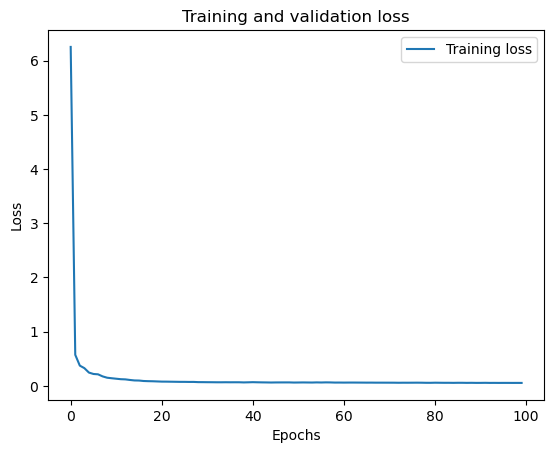

In [80]:
loss = history_reg.history['loss']

plt.plot(loss, label='Training loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

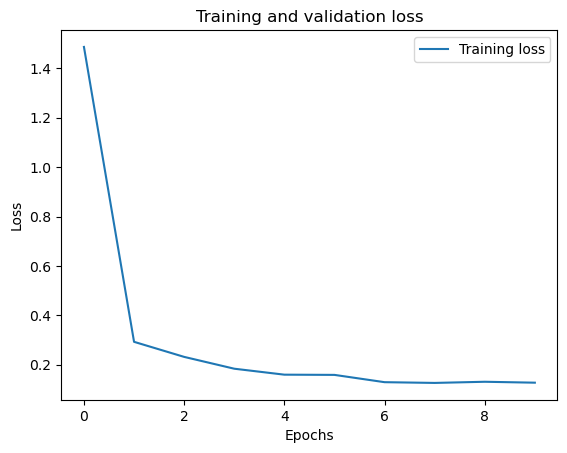

In [81]:
loss = history_floor.history['loss']

plt.plot(loss, label='Training loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

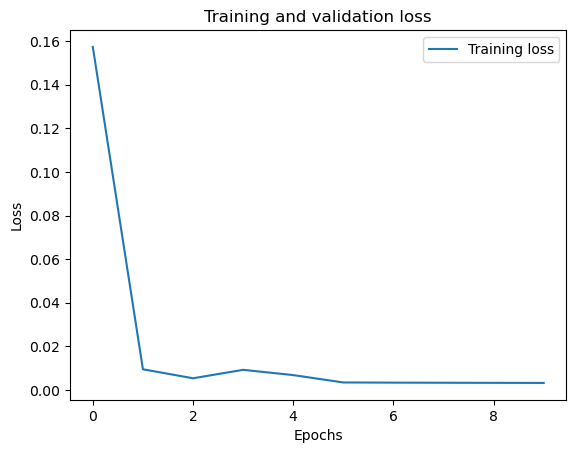

In [82]:
loss = history_building.history['loss']

plt.plot(loss, label='Training loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [83]:
#to save the encoder 
import pickle
with open("encoder_building", "wb") as f: 
    pickle.dump(enc_building, f)
with open("encoder_floor", "wb") as f: 
    pickle.dump(enc_floor, f)

In [84]:
regressor.save('Regressor.h5')
floor_classifier.save('Floor_classifier.h5')
building_classifier.save('Building_classifier.h5')